In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Dictionary for each area with corresponding pole ids

In [4]:
meter_loc_df = pd.read_csv("treas_parking_meters_loc_datasd.csv")

In [5]:
meter_loc = meter_loc_df.drop(['zone', 'sub_area', 'config_id', 'config_name', 'longitude', 'latitude'], axis=1)

loc_pole = meter_loc.set_index(['area','pole'])
loc_pole_dict = meter_loc.groupby('area')['pole'].apply(lambda x: x.values.tolist()).to_dict()

# Single-space parking meters df

In [6]:
# SS meters 
parking_payments_18 = pd.read_csv("treas_parking_payments_2018_datasd.csv")
SS_prk_ta = parking_payments_18[parking_payments_18['meter_type'] == 'SS']

# Bucketing

Function that buckets SS parking meters df into geographical areas.

In [14]:
loc = ['Bankers Hill', 'Barrio Logan', 'College', 'Core - Columbia', 'Cortez Hill', 'East Village', 
         'Five Points', 'Gaslamp', 'Golden Hill', 'Hillcrest', 'Little Italy', 'Marina', 'Midtown', 
         'Mission Beach', 'Mission Hills', 'North Park', 'Point Loma', 'Talmadge', 'University Heights']

In [15]:
def ta_by_area(df, area_num):
    area = loc[area_num]
    area_ID = loc_pole_dict.get(area)
    area_data = df[df.pole_id.isin(area_ID)]
    return area_data

Function that time slices area data.

In [16]:
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
hr_of_day = range(25)

In [17]:
def ta_by_yr(area_data):
    
    trans_amt = area_data['trans_amt'].sum()
    return trans_amt

In [18]:
def ta_by_day(area_data):
    
    area_data['trans_start'] = pd.to_datetime(area_data.trans_start)
    
    trans_amt_days = []
    for i in range(7):
        area_days = area_data.loc[(area_data['trans_start'].dt.dayofweek==i)]
        trans_amt = area_days['trans_amt'].sum()
        trans_amt_days.append(trans_amt)

    return trans_amt_days

In [19]:
def ta_by_hour(area_data):
    
    area_data['trans_start'] = pd.to_datetime(area_data.trans_start)
    
    trans_amt_hourly = []
    for i in range(25):
        area_hrs = area_data.loc[(area_data['trans_start'].dt.hour==i)]
        trans_amt = area_hrs['trans_amt'].sum()
        trans_amt_hourly.append(trans_amt)
        
    return trans_amt_hourly

In [120]:
total_ta_2018 = []

# Bankers Hill

In [22]:
bankers_data = ta_by_area(SS_prk_ta, 0)

In [121]:
bankers_ta_yr = ta_by_yr(bankers_data)
total_ta_2018.append(bankers_ta_yr)
print('Total Bankers Hill trans amt for 2018 = ', bankers_ta_yr)

Total Bankers Hill trans amt for 2018 =  539539596


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[73907160, 125449403, 94643484, 94679880, 86628352, 64047889, 183428]


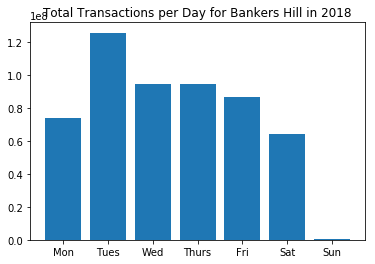

In [123]:
bankers_ta_day = ta_by_day(bankers_data)
print(bankers_ta_day)
plt.title('Total Transactions per Day for Bankers Hill in 2018')
plt.bar(days, bankers_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[740, 295, 2675, 290, 125, 12020, 1941774, 12879591, 50060883, 65911513, 63009848, 68610600, 65690817, 58789266, 47664654, 43025141, 40297490, 21376054, 183290, 45245, 17225, 9105, 9955, 1000, 0]


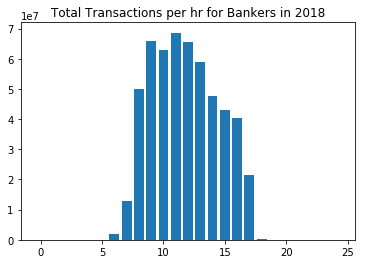

In [124]:
bankers_ta_hr = ta_by_hour(bankers_data)
print(bankers_ta_hr)
plt.title('Total Transactions per hr for Bankers in 2018')
plt.bar(hr_of_day, bankers_ta_hr)
plt.show()

# Barrio Logan

In [125]:
barrio_data = ta_by_area(SS_prk_ta, 1)

In [126]:
barrio_ta_yr = ta_by_yr(barrio_data)
total_ta_2018.append(barrio_ta_yr)
print('Total Barrio Logan trans amt for 2018 = ', barrio_ta_yr)

Total Barrio Logan trans amt for 2018 =  20070257


[2916137, 4588391, 3310173, 3549171, 3141846, 2551244, 13295]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


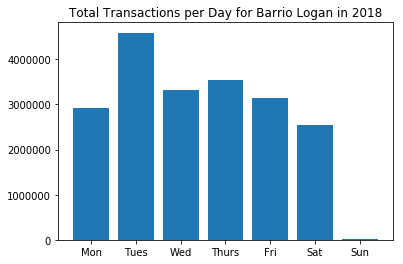

In [128]:
barrio_ta_day = ta_by_day(barrio_data)
print(barrio_ta_day)
plt.title('Total Transactions per Day for Barrio Logan in 2018')
plt.bar(days, barrio_ta_day)
plt.show()

[75, 0, 0, 0, 0, 95, 88089, 261324, 1651476, 2455490, 2006290, 3051069, 2443109, 1958860, 1623341, 1876452, 1830532, 814830, 6120, 2000, 445, 515, 120, 25, 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


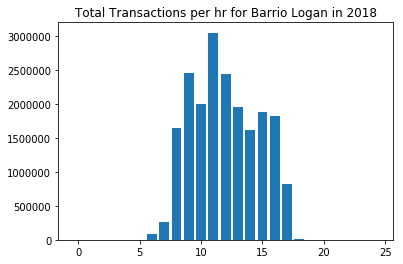

In [129]:
barrio_ta_hr = ta_by_hour(barrio_data)
print(barrio_ta_hr)
plt.title('Total Transactions per hr for Barrio Logan in 2018')
plt.bar(hr_of_day, barrio_ta_hr)
plt.show()

# College

In [130]:
college_data = ta_by_area(SS_prk_ta, 2)
# print(college_data)

In [131]:
college_ta_yr = ta_by_yr(college_data)
total_ta_2018.append(college_ta_yr)
print('Total College trans amt for 2018 = ', college_ta_yr)

Total College trans amt for 2018 =  6758701


[1078850, 1669616, 1159542, 1159452, 1052320, 633031, 5890]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


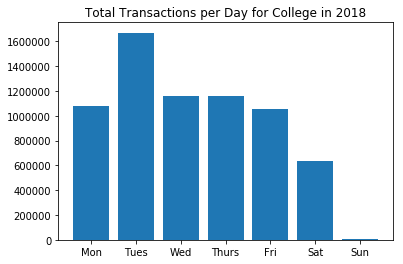

In [132]:
college_ta_day = ta_by_day(college_data)
print(college_ta_day)
plt.title('Total Transactions per Day for College in 2018')
plt.bar(days, college_ta_day)
plt.show()

[0, 0, 50, 0, 0, 50, 30205, 472275, 796111, 613422, 635845, 686726, 684905, 659708, 633115, 787182, 517433, 234654, 365, 5705, 75, 560, 130, 185, 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


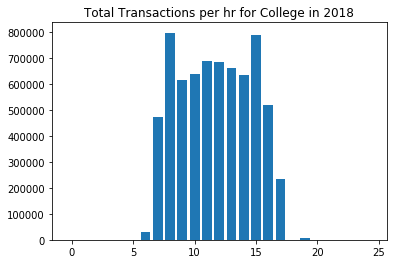

In [133]:
college_ta_hr = ta_by_hour(college_data)
print(college_ta_hr)
plt.title('Total Transactions per hr for College in 2018')
plt.bar(hr_of_day, college_ta_hr)
plt.show()

# Core - Columbia

In [134]:
core_data = ta_by_area(SS_prk_ta, 3)

In [135]:
core_ta_yr = ta_by_yr(core_data)
total_ta_2018.append(core_ta_yr)
print('Total Core-Columbia trans amt for 2018 = ', core_ta_yr)

Total Core-Columbia trans amt for 2018 =  613295386


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[95489051, 137841072, 93630414, 96843735, 97829864, 91373345, 287905]


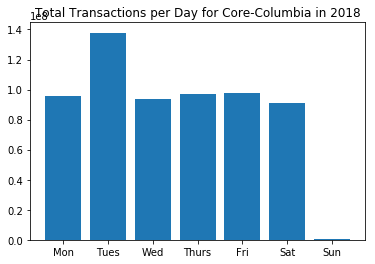

In [136]:
core_ta_day = ta_by_day(core_data)
print(core_ta_day)
plt.title('Total Transactions per Day for Core-Columbia in 2018')
plt.bar(days, core_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[2900, 2510, 8930, 6630, 5710, 27725, 6824124, 37219689, 62359194, 54246079, 61229395, 62449595, 65222051, 61288677, 59939980, 55666407, 57764222, 28511023, 231345, 86790, 107865, 22190, 27265, 45090, 0]


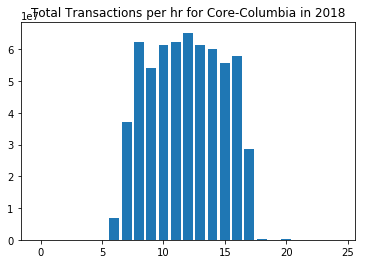

In [137]:
core_ta_hr = ta_by_hour(core_data)
print(core_ta_hr)
plt.title('Total Transactions per hr for Core-Columbia in 2018')
plt.bar(hr_of_day, core_ta_hr)
plt.show()

# Cortez Hill

In [138]:
cortez_data = ta_by_area(SS_prk_ta, 4)

In [139]:
cortez_ta_yr = ta_by_yr(cortez_data)
total_ta_2018.append(cortez_ta_yr)
print('Total Cortez Hill trans amt for 2018 = ', cortez_ta_yr)

Total Cortez Hill trans amt for 2018 =  235912025


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[37084023, 54628867, 40744123, 39412291, 36798994, 27142182, 101545]


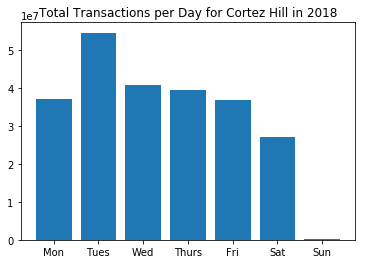

In [140]:
cortez_ta_day = ta_by_day(cortez_data)
print(cortez_ta_day)
plt.title('Total Transactions per Day for Cortez Hill in 2018')
plt.bar(days, cortez_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[405, 835, 85, 80, 610, 3910, 7088698, 18285499, 28010204, 27127568, 25978809, 25514304, 24179817, 22295510, 16616248, 15727393, 16428967, 8542233, 61505, 11250, 2730, 26125, 6680, 2560, 0]


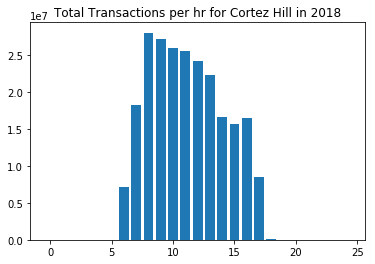

In [141]:
cortez_ta_hr = ta_by_hour(cortez_data)
print(cortez_ta_hr)
plt.title('Total Transactions per hr for Cortez Hill in 2018')
plt.bar(hr_of_day, cortez_ta_hr)
plt.show()

# East Village

In [142]:
east_data = ta_by_area(SS_prk_ta, 5)

In [143]:
east_ta_yr = ta_by_yr(east_data)
total_ta_2018.append(east_ta_yr)
print('Total East Village trans amt for 2018 = ', east_ta_yr)

Total East Village trans amt for 2018 =  1085005660


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[164393180, 243220488, 169054956, 173605049, 177128367, 157103775, 499845]


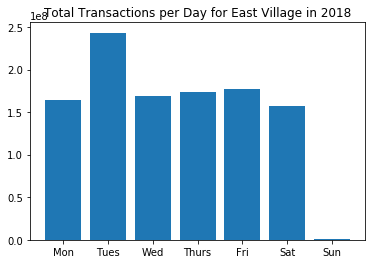

In [144]:
east_ta_day = ta_by_day(east_data)
print(east_ta_day)
plt.title('Total Transactions per Day for East Village in 2018')
plt.bar(days, east_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[31720, 12855, 10895, 8005, 4715, 37360, 19122615, 44012550, 100443616, 110187363, 103320394, 110824002, 120127273, 104876008, 101455870, 104972799, 97199957, 47539621, 15232318, 5314619, 119910, 66880, 35600, 48715, 0]


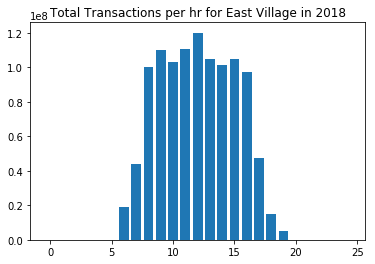

In [145]:
east_ta_hr = ta_by_hour(east_data)
print(east_ta_hr)
plt.title('Total Transactions per hr for East Village in 2018')
plt.bar(hr_of_day, east_ta_hr)
plt.show()

# Five Points

In [146]:
five_data = ta_by_area(SS_prk_ta, 6)

In [147]:
five_ta_yr = ta_by_yr(five_data)
total_ta_2018.append(five_ta_yr)
print('Total Five Points trans amt for 2018 = ', five_ta_yr)

Total Five Points trans amt for 2018 =  67868099


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[9251011, 13259981, 10064906, 10916112, 10955193, 13313881, 107015]


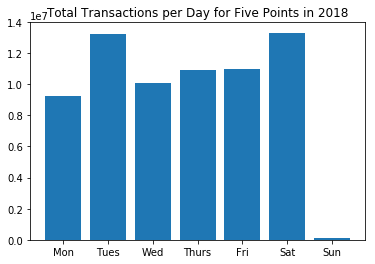

In [148]:
five_ta_day = ta_by_day(five_data)
print(five_ta_day)
plt.title('Total Transactions per Day for Five Points in 2018')
plt.bar(days, five_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[23315, 0, 0, 0, 0, 350, 30110, 284451, 1344589, 1779236, 4759524, 12810574, 11307547, 9769326, 7369871, 6372511, 6874452, 5012673, 60465, 29565, 11195, 6770, 18685, 2890, 0]


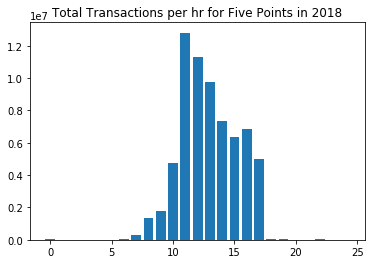

In [149]:
five_ta_hr = ta_by_hour(five_data)
print(five_ta_hr)
plt.title('Total Transactions per hr for Five Points in 2018')
plt.bar(hr_of_day, five_ta_hr)
plt.show()

# Gaslamp

In [150]:
gaslamp_data = ta_by_area(SS_prk_ta, 7)

In [151]:
gaslamp_ta_yr = ta_by_yr(gaslamp_data)
total_ta_2018.append(gaslamp_ta_yr)
print('Total Gaslamp trans amt for 2018 = ', gaslamp_ta_yr)

Total Gaslamp trans amt for 2018 =  536793629


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[81078075, 120692224, 82703990, 85264135, 83083078, 83640623, 331504]


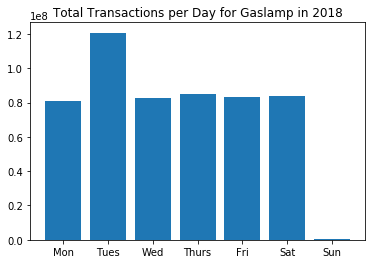

In [153]:
gaslamp_ta_day = ta_by_day(gaslamp_data)
print(gaslamp_ta_day)
plt.title('Total Transactions per Day for Gaslamp in 2018')
plt.bar(days, gaslamp_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[31435, 35415, 14030, 1425, 1955, 5390, 495732, 3711899, 17867411, 35056025, 50471902, 48324275, 59899765, 51973994, 50155431, 52388803, 57840449, 52520256, 41403813, 14215635, 200045, 73405, 68630, 36509, 0]


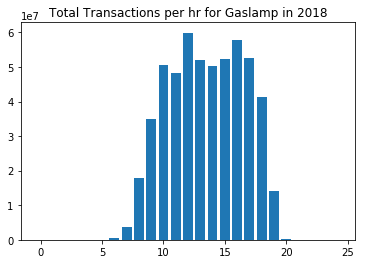

In [154]:
gaslamp_ta_hr = ta_by_hour(gaslamp_data)
print(gaslamp_ta_hr)
plt.title('Total Transactions per hr for Gaslamp in 2018')
plt.bar(hr_of_day, gaslamp_ta_hr)
plt.show()

# Golden Hill

In [155]:
golden_data = ta_by_area(SS_prk_ta, 8)

In [156]:
golden_ta_yr = ta_by_yr(golden_data)
total_ta_2018.append(golden_ta_yr)
print('Total Golden Hill trans amt for 2018 = ', golden_ta_yr)

Total Golden Hill trans amt for 2018 =  8655152


[1366993, 1720296, 1260926, 1155342, 1561694, 1569831, 20070]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


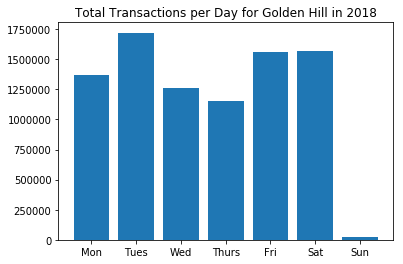

In [157]:
golden_ta_day = ta_by_day(golden_data)
print(golden_ta_day)
plt.title('Total Transactions per Day for Golden Hill in 2018')
plt.bar(days, golden_ta_day)
plt.show()

[25, 0, 0, 0, 0, 80, 4680, 156609, 923904, 680695, 745480, 1196443, 1355902, 932530, 742880, 801204, 624722, 477253, 6365, 775, 5605, 0, 0, 0, 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


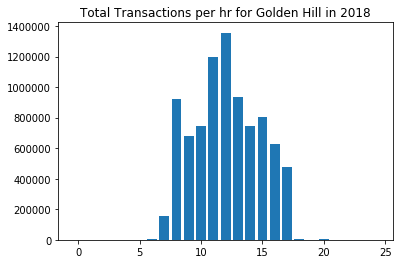

In [158]:
golden_ta_hr = ta_by_hour(golden_data)
print(golden_ta_hr)
plt.title('Total Transactions per hr for Golden Hill in 2018')
plt.bar(hr_of_day, golden_ta_hr)
plt.show()

# Hillcrest

In [159]:
hillcrest_data = ta_by_area(SS_prk_ta, 9)

In [160]:
hillcrest_ta_yr = ta_by_yr(hillcrest_data)
total_ta_2018.append(hillcrest_ta_yr)
print('Total Hillcrest trans amt for 2018 = ', hillcrest_ta_yr)

Total Hillcrest trans amt for 2018 =  760950979


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[107107563, 166103057, 116689041, 119336880, 124124155, 127115513, 474770]


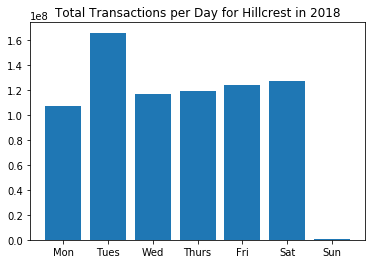

In [161]:
hillcrest_ta_day = ta_by_day(hillcrest_data)
print(hillcrest_ta_day)
plt.title('Total Transactions per Day for Hillcrest in 2018')
plt.bar(days, hillcrest_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[38470, 12025, 1100, 1660, 3660, 13545, 369014, 3129828, 22270908, 54718032, 77881130, 81126968, 85455496, 78623649, 71527681, 68784589, 69087425, 71628760, 57307479, 18685590, 142300, 65070, 54205, 22395, 0]


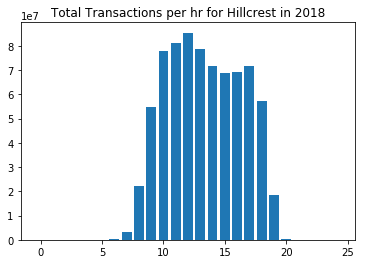

In [162]:
hillcrest_ta_hr = ta_by_hour(hillcrest_data)
print(hillcrest_ta_hr)
plt.title('Total Transactions per hr for Hillcrest in 2018')
plt.bar(hr_of_day, hillcrest_ta_hr)
plt.show()

# Little Italy

In [163]:
little_data = ta_by_area(SS_prk_ta, 10)

In [164]:
little_ta_yr = ta_by_yr(little_data)
total_ta_2018.append(little_ta_yr)
print('Total Little Italy trans amt for 2018 = ', little_ta_yr)

Total Little Italy trans amt for 2018 =  701749409


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[102801240, 149109381, 106196899, 107945437, 114346441, 120998967, 351044]


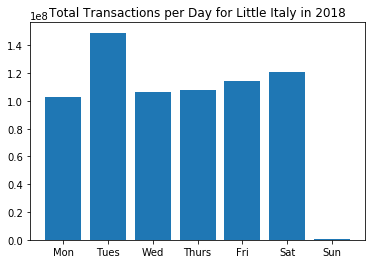

In [165]:
little_ta_day = ta_by_day(little_data)
print(little_ta_day)
plt.title('Total Transactions per Day for Little Italy in 2018')
plt.bar(days, little_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[1000, 345, 420, 335, 3385, 21300, 7470667, 26415910, 64191088, 66914006, 76643844, 80111626, 81131880, 76296294, 65082618, 64150510, 66902741, 26040241, 131639, 79855, 48680, 27160, 63720, 20145, 0]


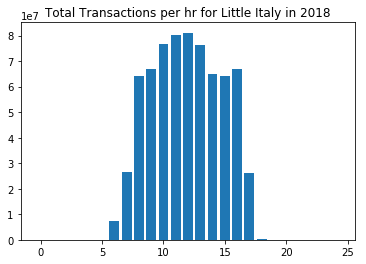

In [166]:
little_ta_hr = ta_by_hour(little_data)
print(little_ta_hr)
plt.title('Total Transactions per hr for Little Italy in 2018')
plt.bar(hr_of_day, little_ta_hr)
plt.show()

# Marina

In [167]:
marina_data = ta_by_area(SS_prk_ta, 11)

In [168]:
marina_ta_yr = ta_by_yr(marina_data)
total_ta_2018.append(marina_ta_yr)
print('Total Marina trans amt for 2018 = ', marina_ta_yr)

Total Marina trans amt for 2018 =  665414721


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[97429529, 143039925, 104492662, 105359931, 107300594, 107633395, 158685]


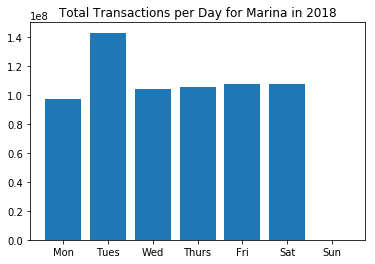

In [169]:
marina_ta_day = ta_by_day(marina_data)
print(marina_ta_day)
plt.title('Total Transactions per Day for Marina in 2018')
plt.bar(days, marina_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[4590, 4955, 410, 500, 505, 24580, 65153694, 37421161, 63075584, 66589962, 61598850, 51437070, 53134851, 52344931, 50089120, 56154491, 51673517, 33286721, 17656459, 5646650, 53990, 26810, 16745, 18575, 0]


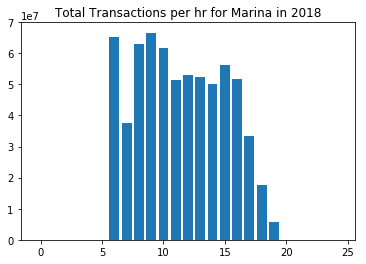

In [170]:
marina_ta_hr = ta_by_hour(marina_data)
print(marina_ta_hr)
plt.title('Total Transactions per hr for Marina in 2018')
plt.bar(hr_of_day, marina_ta_hr)
plt.show()

# Midtown

In [171]:
midtown_data = ta_by_area(SS_prk_ta, 12)

In [172]:
midtown_ta_yr = ta_by_yr(midtown_data)
total_ta_2018.append(midtown_ta_yr)
print('Total Midtown trans amt for 2018 = ', midtown_ta_yr)

Total Midtown trans amt for 2018 =  2254526


[185779, 495209, 338234, 334000, 268679, 624760, 7865]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


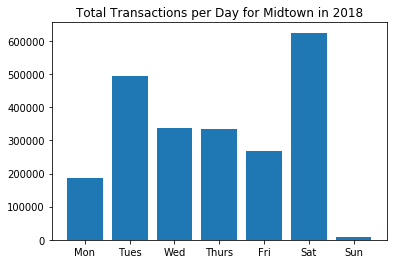

In [173]:
midtown_ta_day = ta_by_day(midtown_data)
print(midtown_ta_day)
plt.title('Total Transactions per Day for Midtown in 2018')
plt.bar(days, midtown_ta_day)
plt.show()

[5125, 0, 0, 30, 0, 0, 100, 890, 42505, 495840, 497045, 282505, 296638, 229875, 153719, 114934, 45730, 79010, 5225, 125, 80, 100, 5050, 0, 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


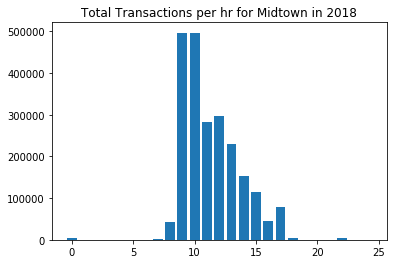

In [174]:
midtown_ta_hr = ta_by_hour(midtown_data)
print(midtown_ta_hr)
plt.title('Total Transactions per hr for Midtown in 2018')
plt.bar(hr_of_day, midtown_ta_hr)
plt.show()

# Mission Beach

In [175]:
mission_b_data = ta_by_area(SS_prk_ta, 13)

In [176]:
mission_b_ta_yr = ta_by_yr(mission_b_data)
total_ta_2018.append(mission_b_ta_yr)
print('Total Mission Beach trans amt for 2018 = ', mission_b_ta_yr)

Total Mission Beach trans amt for 2018 =  645675


[74825, 159550, 103580, 85940, 74795, 142810, 4175]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


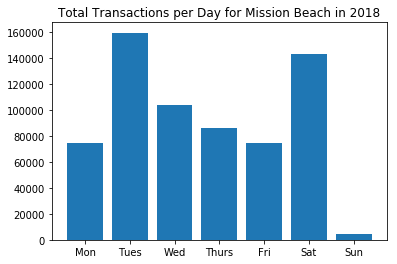

In [177]:
mission_b_ta_day = ta_by_day(mission_b_data)
print(mission_b_ta_day)
plt.title('Total Transactions per Day for Mission Beach in 2018')
plt.bar(days, mission_b_ta_day)
plt.show()

[0, 0, 0, 0, 0, 0, 300, 7870, 46765, 44380, 36875, 47455, 62165, 61220, 40870, 62710, 86635, 147175, 630, 425, 200, 0, 0, 0, 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


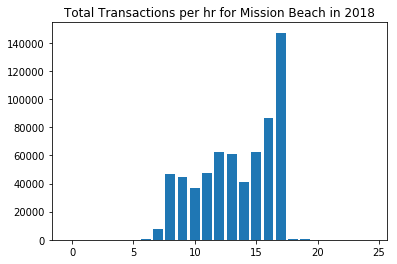

In [178]:
mission_b_ta_hr = ta_by_hour(mission_b_data)
print(mission_b_ta_hr)
plt.title('Total Transactions per hr for Mission Beach in 2018')
plt.bar(hr_of_day, mission_b_ta_hr)
plt.show()

# Mission Hills

In [179]:
mission_h_data = ta_by_area(SS_prk_ta, 14)

In [180]:
mission_h_ta_yr = ta_by_yr(mission_h_data)
total_ta_2018.append(mission_h_ta_yr)
print('Total Mission Hills trans amt for 2018 = ', mission_h_ta_yr)

Total Mission Hills trans amt for 2018 =  108006822


[14193361, 22757053, 16175174, 17087055, 18355084, 19342000, 97095]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


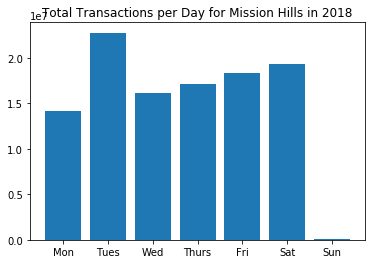

In [181]:
mission_h_ta_day = ta_by_day(mission_h_data)
print(mission_h_ta_day)
plt.title('Total Transactions per Day for Mission Hills in 2018')
plt.bar(days, mission_h_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[40, 50, 60, 0, 0, 200, 112169, 1547152, 7004614, 10885234, 10561936, 14758776, 14321645, 11987702, 9820278, 9400813, 10909677, 6615711, 51095, 18815, 6000, 4180, 205, 470, 0]


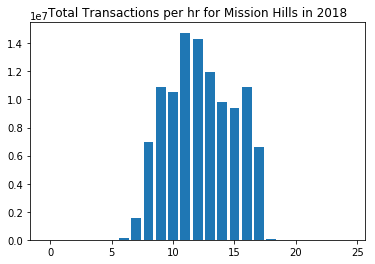

In [182]:
mission_h_ta_hr = ta_by_hour(mission_h_data)
print(mission_h_ta_hr)
plt.title('Total Transactions per hr for Mission Hills in 2018')
plt.bar(hr_of_day, mission_h_ta_hr)
plt.show()

# North Park

In [183]:
north_data = ta_by_area(SS_prk_ta, 15)

In [184]:
north_ta_yr = ta_by_yr(north_data)
total_ta_2018.append(north_ta_yr)
print('Total North Park trans amt for 2018 = ', north_ta_yr)

Total North Park trans amt for 2018 =  77505386


[10147971, 16167897, 10307824, 11712394, 12591150, 16483535, 94615]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


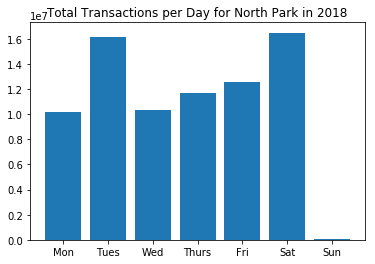

In [185]:
north_ta_day = ta_by_day(north_data)
print(north_ta_day)
plt.title('Total Transactions per Day for North Park in 2018')
plt.bar(days,north_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[335, 305, 125, 80, 95, 140, 76539, 916027, 4521871, 6557129, 7835508, 8946057, 9496106, 8674945, 8516221, 8345230, 8862657, 4599346, 87880, 33385, 9855, 13020, 1450, 11080, 0]


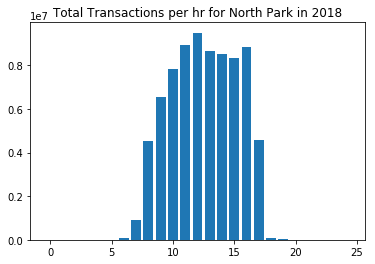

In [186]:
north_ta_hr = ta_by_hour(north_data)
print(north_ta_hr)
plt.title('Total Transactions per hr for North Park in 2018')
plt.bar(hr_of_day, north_ta_hr)
plt.show()

# Point Loma

In [187]:
point_data = ta_by_area(SS_prk_ta, 16)

In [188]:
point_ta_yr = ta_by_yr(point_data)
total_ta_2018.append(point_ta_yr)
print('Total Point Loma trans amt for 2018 = ', point_ta_yr)

Total Point Loma trans amt for 2018 =  3202331


[396664, 675475, 536971, 581716, 502984, 498526, 9995]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


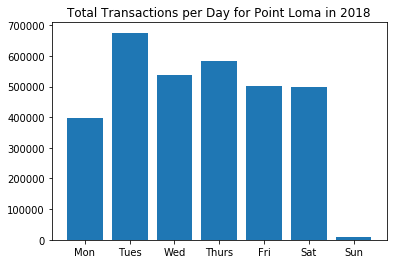

In [189]:
point_ta_day = ta_by_day(point_data)
print(point_ta_day)
plt.title('Total Transactions per Day for Point Loma in 2018')
plt.bar(days, point_ta_day)
plt.show()

[0, 0, 0, 0, 0, 0, 500, 2613, 46169, 167777, 201368, 586406, 470607, 454248, 253485, 249173, 412115, 356960, 630, 230, 25, 0, 25, 0, 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


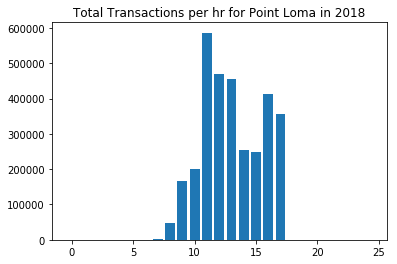

In [190]:
point_ta_hr = ta_by_hour(point_data)
print(point_ta_hr)
plt.title('Total Transactions per hr for Point Loma in 2018')
plt.bar(hr_of_day, point_ta_hr)
plt.show()

# Talmadge

In [191]:
talmadge_data = ta_by_area(SS_prk_ta, 17)

In [192]:
talmadge_ta_yr = ta_by_yr(talmadge_data)
total_ta_2018.append(talmadge_ta_yr)
print('Total Talmadge trans amt for 2018 = ', talmadge_ta_yr)

Total Talmadge trans amt for 2018 =  11380891


[2052470, 2359715, 1562848, 1821294, 1660900, 1899934, 23730]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


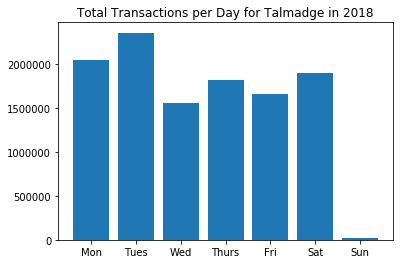

In [193]:
talmadge_ta_day = ta_by_day(talmadge_data)
print(talmadge_ta_day)
plt.title('Total Transactions per Day for Talmadge in 2018')
plt.bar(days, talmadge_ta_day)
plt.show()

[100, 0, 0, 0, 50, 25, 22905, 47364, 629408, 969215, 1104010, 1344437, 1495013, 1325450, 1159354, 1202528, 1352791, 681246, 19380, 17595, 5240, 945, 3280, 555, 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


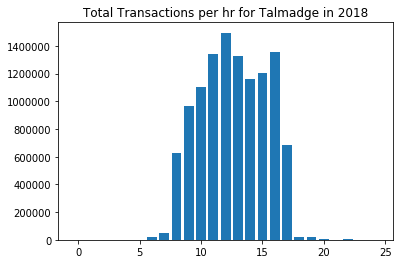

In [194]:
talmadge_ta_hr = ta_by_hour(talmadge_data)
print(talmadge_ta_hr)
plt.title('Total Transactions per hr for Talmadge in 2018')
plt.bar(hr_of_day, talmadge_ta_hr)
plt.show()

# University Heights

In [195]:
university_data = ta_by_area(SS_prk_ta, 18)

In [196]:
university_ta_yr = ta_by_yr(university_data)
total_ta_2018.append(university_ta_yr)
print('Total University Heights trans amt for 2018 = ', university_ta_yr)

Total University Heights trans amt for 2018 =  61244982


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


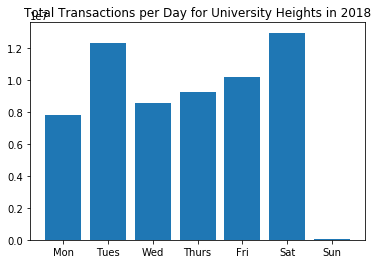

In [197]:
university_ta_day = ta_by_day(university_data)
plt.title('Total Transactions per Day for University Heights in 2018')
plt.bar(days, university_ta_day)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[260, 1230, 45, 25, 370, 150, 299613, 1244759, 3384350, 4782987, 5475975, 6932949, 6938529, 6181750, 6145614, 6842815, 7970335, 4943326, 43680, 19335, 31615, 750, 4135, 385, 0]


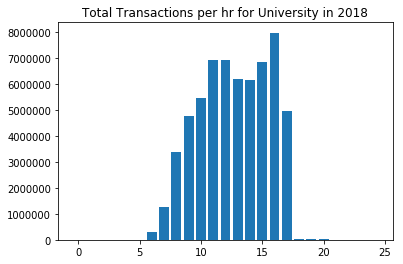

In [198]:
university_ta_hr = ta_by_hour(university_data)
print(university_ta_hr)
plt.title('Total Transactions per hr for University in 2018')
plt.bar(hr_of_day, university_ta_hr)
plt.show()

# Comparing total trans amt for each area

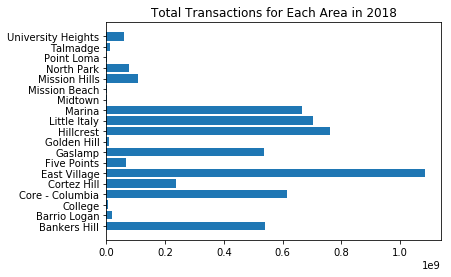

In [199]:
plt.title('Total Transactions for Each Area in 2018')
plt.barh(loc, total_ta_2018, align='center', alpha=1)
plt.show()